<a href="https://colab.research.google.com/github/neuralresearch/CS39-6/blob/henry/HenryTaGSim_GraphEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Type-Aware Graph Embedding

### Loading New Dataset

In [1]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
import pandas as pd
import copy
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#get the train data from the drive
id = '1s7ng3JypVvjtoUF8eUFPGroCTNtkxzIE'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('updated_train.zip')
#get the test data from the drive
id = '11FK00L91jajUW15hzjsskNkN0DRsS_yN'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('updated_test.zip')
!ls

sample_data  updated_test.zip  updated_train.zip


In [2]:
#if train and test exist do not run this part
#removing the dialog
%%capture
#unzip the file
!unzip updated_train.zip
!unzip updated_test.zip

### Data visualization

First graph: 10098.gexf


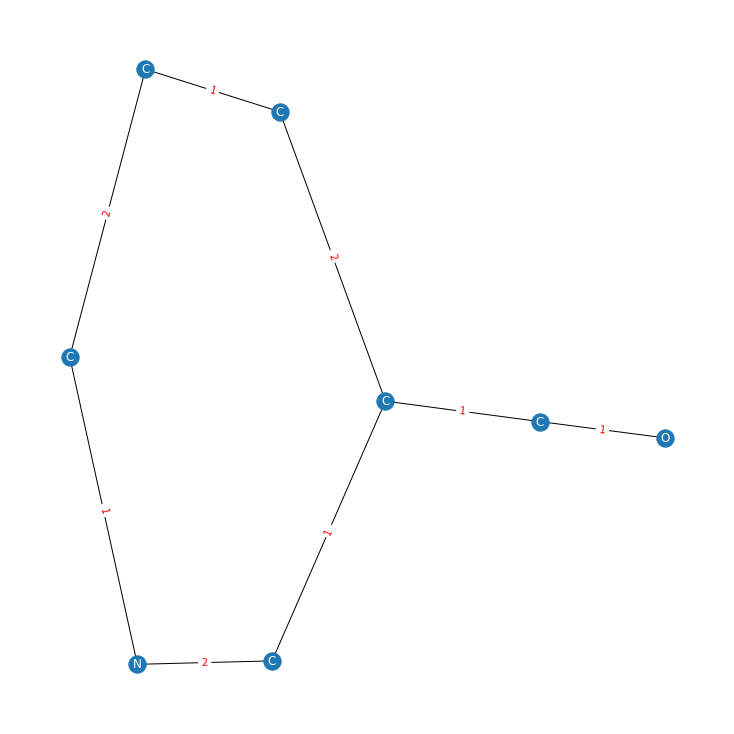

Second graph: 331112123_10098.gexf


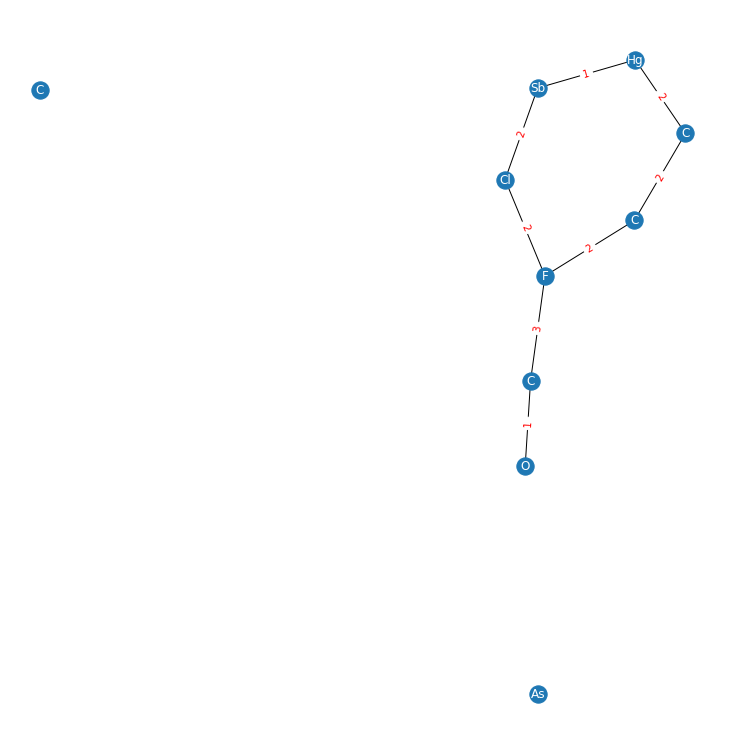

Their GEV: 331112123


In [3]:
# pick a pair graph
import os
import random
import matplotlib.pyplot as plt
import networkx as nx

dirName = 'updated_train/'
filenames = os.listdir(dirName)

#pick random pair
pair_1 = random.choice(filenames)
while '_' in pair_1:
  pair_1 = random.choice(filenames)
for filename in filenames:
    if filename.endswith("_"+pair_1):
      pair_2 = filename
      gev = pair_2.split('_', 1)[0]
#read pair 1
print("First graph: "+pair_1)
graph1 = nx.read_gexf('updated_train/'+pair_1,version='1.2draft')

node_info = nx.get_node_attributes(graph1, 'type')
edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in graph1.edges(data=True)])

#graph display
pos = nx.spring_layout(graph1, scale=1.5)  
plt.figure(1,figsize=(10,10)) 
nx.draw(graph1, pos, labels=node_info, font_color="white")
nx.draw_networkx_edge_labels(graph1, pos, edge_labels=edge_info, font_color="red")
plt.show()
#read pair 2
print("Second graph: "+pair_2)
graph2 = nx.read_gexf('updated_train/'+pair_2,version='1.2draft')

node_info = nx.get_node_attributes(graph2, 'type')
edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in graph2.edges(data=True)])

#graph display
pos = nx.spring_layout(graph2, scale=1.5)  
plt.figure(1,figsize=(10,10)) 
nx.draw(graph2, pos, labels=node_info, font_color="white")
nx.draw_networkx_edge_labels(graph2, pos, edge_labels=edge_info, font_color="red")
plt.show()
print("Their GEV: "+gev)

First graph: 10098.gexf


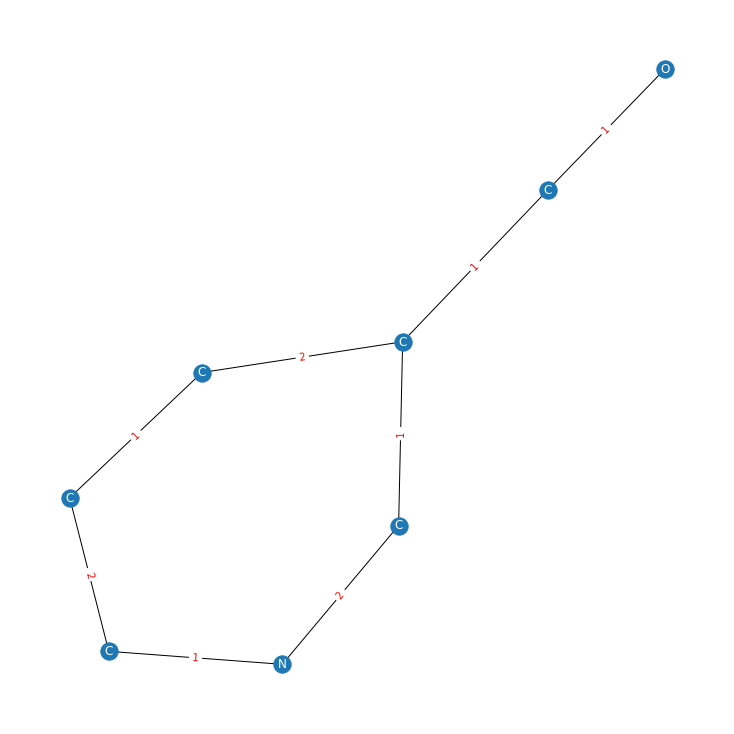

In [4]:

#read pair 1
print("First graph: "+pair_1)
graph1 = nx.read_gexf('updated_train/'+pair_1,version='1.2draft')

node_info = nx.get_node_attributes(graph1, 'type')
edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in graph1.edges(data=True)])

#graph display
pos = nx.spring_layout(graph1, scale=1.5)  
plt.figure(1,figsize=(10,10)) 
nx.draw(graph1, pos, labels=node_info, font_color="white")
nx.draw_networkx_edge_labels(graph1, pos, edge_labels=edge_info, font_color="red")
plt.show()

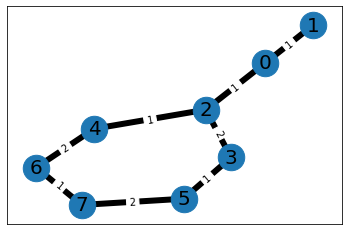

In [5]:

def draw_graph_id(G):
  pos=nx.spring_layout(G ,seed=42,scale=2)
  edgelist=G.edges
  edge_labels = nx.get_edge_attributes(G, "valence")

  nx.draw_networkx_nodes(G, pos, node_size=700)
  nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=6)
  nx.draw_networkx_labels(G, pos,  font_size=20, font_family="sans-serif")
  nx.draw_networkx_edge_labels(G, pos, edge_labels)
draw_graph_id(graph1)

In [33]:
def ELM(graph,distance,labelList=None):

  labelDfList={}
  labelDictZero={} 
  for label in labelList: 
    labelDfList[label]=[]
    labelDictZero[label]=0
  ELM=pd.DataFrame(labelDfList)

  nodeDistDict=dict(nx.all_pairs_shortest_path_length(graph1))
  #dict(nx.all_pairs_shortest_path_length(graph1))

  #edge_info = dict([((n1, n2), d['valence']) for n1, n2, d in graph1.edges(data=True)])
  for n1, n2, d in graph1.edges(data=True):
    labelDict=copy.deepcopy(labelDictZero) 
    for n3, n4, d2 in graph1.edges(data=True):
      distList=[nodeDistDict[n1][n3],    nodeDistDict[n1][n4],    nodeDistDict[n2][n3],    nodeDistDict[n2][n4]]
      nodeDist=max(distList)
      nodeDistMin=min(distList)
      if distance ==0 :
        if d['id']==d2['id']:
          labelDict[d2['valence']]=labelDict[d2['valence']]+1
      elif  distance ==1 :
        if distance==(nodeDist-1) and nodeDistMin==0:
          labelDict[d2['valence']]=labelDict[d2['valence']]+1
        elif distance==(nodeDist) and d['id']!=d2['id'] : #triangle        
          labelDict[d2['valence']]=labelDict[d2['valence']]+1
      elif distance==(nodeDist-1) :     
        labelDict[d2['valence']]=labelDict[d2['valence']]+1
    ELM = ELM.append(labelDict, ignore_index=True)
  return ELM

def getEdgeLabel(graph1,graph2):
  edge_info_1 =  graph1.edges(data=True)
  edge_info_2 =  graph2.edges(data=True)
  edgeLabel=set()
  for n1, n2, d in edge_info_1:
    edgeLabel.add(d['valence'])
  for n1, n2, d in edge_info_2:
    edgeLabel.add(d['valence'])
  return list(edgeLabel) 


def NLM(graph,distance,labelList=None):

  all_pair_distance=dict(nx.all_pairs_shortest_path_length(graph))
  node_info = nx.get_node_attributes(graph, 'type')

  labelDfList={}
  labelDictZero={}
  for label in labelList:
    labelDfList[label]=[]
    labelDictZero[label]=0
  NLM=pd.DataFrame(labelDfList)

  for node in all_pair_distance:
    labelDict=copy.deepcopy(labelDictZero) 
    for other_node in all_pair_distance[node]:
      if all_pair_distance[node][other_node]==distance:
        labelDict[node_info[other_node]]=labelDict[node_info[other_node]]+1
    NLM = NLM.append(labelDict, ignore_index=True)
  return NLM
def getNodeLabel(graph1,graph2):
  node_info_1 = nx.get_node_attributes(graph1, 'type')
  node_info_2 = nx.get_node_attributes(graph2, 'type')
  nodeLabel=set()
  for node in node_info_1:
    nodeLabel.add(node_info_1[node])
  for node in node_info_2:
    nodeLabel.add(node_info_2[node])
  return list(nodeLabel)
def Embeding(graph1,graph2):
  LabelList=getNodeLabel(graph1,graph2)
  labelList=getEdgeLabel(graph1,graph2)


  graph1_NLM0=NLM(graph1,0,LabelList)
  graph1_NLM1=NLM(graph1,1,LabelList)
  graph1_NLM2=NLM(graph1,2,LabelList)
  graph1_NLM01=graph1_NLM0.merge(graph1_NLM1, left_index=True, right_index=True, how = 'right' )
  graph1_NLM01_pooling=graph1_NLM01.sum()
  graph1_NLM12=graph1_NLM1.merge(graph1_NLM2, left_index=True, right_index=True, how = 'right' )
  graph1_NLM12_pooling=graph1_NLM12.sum()

  graph1_ELM0=ELM(graph1,0,labelList)
  graph1_ELM1=ELM(graph1,1,labelList)
  graph1_ELM2=ELM(graph1,2,labelList)
  graph1_ELM01=graph1_ELM0.merge(graph1_ELM1, left_index=True, right_index=True, how = 'right' )
  graph1_ELM01_pooling=graph1_ELM01.sum()


  graph2_NLM0=NLM(graph2,0,LabelList)
  graph2_NLM1=NLM(graph2,1,LabelList)
  graph2_NLM2=NLM(graph2,2,LabelList)
  graph2_NLM01=graph2_NLM0.merge(graph2_NLM1, left_index=True, right_index=True, how = 'right' )
  graph2_NLM01_pooling=graph2_NLM01.sum()
  graph2_NLM12=graph2_NLM1.merge(graph2_NLM2, left_index=True, right_index=True, how = 'right' )
  graph2_NLM12_pooling=graph2_NLM12.sum()

  graph2_ELM0=ELM(graph2,0,labelList)
  graph2_ELM1=ELM(graph2,1,labelList)
  graph2_ELM2=ELM(graph2,2,labelList)
  graph2_ELM01=graph2_ELM0.merge(graph2_ELM1, left_index=True, right_index=True, how = 'right' )
  graph2_ELM01_pooling=graph2_ELM01.sum()


  return [graph1_NLM01_pooling,graph1_NLM12_pooling,graph1_ELM01_pooling,graph2_NLM01_pooling,graph2_NLM12_pooling,graph2_ELM01_pooling]

Embeding(graph1,graph2)

[Cl_x     0.0
 Sb_x     0.0
 N_x      1.0
 C_x      6.0
 O_x      1.0
 Hg_x     0.0
 As_x     0.0
 F_x      0.0
 Cl_y     0.0
 Sb_y     0.0
 N_y      2.0
 C_y     13.0
 O_y      1.0
 Hg_y     0.0
 As_y     0.0
 F_y      0.0
 dtype: float64, Cl_x     0.0
 Sb_x     0.0
 N_x      2.0
 C_x     13.0
 O_x      1.0
 Hg_x     0.0
 As_x     0.0
 F_x      0.0
 Cl_y     0.0
 Sb_y     0.0
 N_y      2.0
 C_y     15.0
 O_y      1.0
 Hg_y     0.0
 As_y     0.0
 F_y      0.0
 dtype: float64, 1_x     5.0
 2_x     3.0
 3_x     0.0
 1_y    11.0
 2_y     7.0
 3_y     0.0
 dtype: float64, Cl_x    1.0
 Sb_x    1.0
 N_x     0.0
 C_x     4.0
 O_x     1.0
 Hg_x    1.0
 As_x    1.0
 F_x     1.0
 Cl_y    2.0
 Sb_y    2.0
 N_y     0.0
 C_y     6.0
 O_y     1.0
 Hg_y    2.0
 As_y    0.0
 F_y     3.0
 dtype: float64, Cl_x    2.0
 Sb_x    2.0
 N_x     0.0
 C_x     6.0
 O_x     1.0
 Hg_x    2.0
 As_x    0.0
 F_x     3.0
 Cl_y    3.0
 Sb_y    2.0
 N_y     0.0
 C_y     7.0
 O_y     1.0
 Hg_y    2.0
 As_y    0.0
 F_y   